# MVP Análise de Dados e Boas Práticas

**Nome:** Vanessa Araújo

**Matrícula:** 4052025000836

**Dataset:** Anomalia de trincas

#1. Descrição do Problema
Em 2024, na empresa onde trabalho, foi identificada uma anomalia na produção de perfis estruturais de compósitos poliméricos, utilizados na fabricação de um produto específico. Parte dos produtos finais apresentou trincas em uma região localizada da peça, observadas principalmente durante o transporte ou na chegada ao cliente, indicando uma possível fragilidade mecânica.

Diante desse cenário, foi iniciado um processo interno de investigação para identificar as possíveis causas relacionadas à produção, considerando desde falhas no processo fabril, características de uso, até variações nas matérias-primas. Por se tratar de um sistema de materiais compósitos — cujo desempenho depende de múltiplas variáveis — o diagnóstico se mostrou desafiador.

Após a exclusão de diversas hipóteses iniciais, a atenção se voltou para uma matéria-prima específica. Esse insumo, por sua função aparentemente secundária no composto, inicialmente não havia sido considerado crítico. No entanto, após relatos de dificuldades até mesmo durante a produção com um determinado lote  (P), e posterior observação de falhas estruturais em produtos feitos com ele, a investigação passou a considerá-lo como o principal suspeito.

Em um período posterior, mesmo com a suspeita levantada, esse lote ainda foi utilizado de forma parcial, misturado com outros dois lotes (R e S), por representar uma proporção reduzida da formulação (33%). Esse fato permitiu que a anomalia continuasse ocorrendo de forma mais sutil, dificultando ainda mais sua identificação.

A realização de ensaios de resistência ao impacto (Charpy) em alguns lotes confirmou a hipótese: foi observada uma correlação entre menor energia absorvida nos testes e o aumento de falhas no produto final, indicando comprometimento da integridade estrutural.

Para investigar mais a fundo, foram coletados e organizados dados de:

Reclamações de clientes contendo informações sobre a data de fabricação, a quantidade de itens defeituosos e o padrão de trinca observado;

Períodos de utilização dos lotes da matéria-prima suspeita;

Resultados de ensaios Charpy realizados em alguns desses lotes.

Este trabalho tem como objetivo aplicar ferramentas de análise exploratória de dados e visualizações estatísticas para entender os padrões associados à anomalia, testar hipóteses levantadas e gerar insights que possam embasar futuras decisões da empresa, além de preparar o conjunto de dados para possíveis etapas de modelagem preditiva.

Por fim, reforça-se que todos os dados utilizados neste estudo são estritamente confidenciais, pertencentes à empresa, e foram tratados com responsabilidade para garantir a segurança das informações corporativas.

##Hipóteses do Problema
Hipótese 1 – A ocorrência de trincas é crônica e pode acontecer mesmo em lotes considerados "bons", devido a uma fragilidade estrutural inerente da região afetada, que é mais suscetível a impactos ou danos adicionais.

Hipótese 2 – Existe correlação entre a resistência ao impacto medida pelo ensaio Charpy do lote da matéria prima e a quantidade de produtos com trincas?

Hipótese 3 – O problema de trincas se agravou em 2024, período no qual foram utilizados lotes com resistência ao impacto reduzida.

Hipótese 4 – A presença de outras avarias além das trincas pode indicar a influência de fatores operacionais ou relacionados ao transporte, além da qualidade do material.

Hipótese 5 – A classificação inicial das reclamações pode ter sido enviesada, mascarando a verdadeira causa das falhas, especialmente antes da identificação da anomalia.

## Tipo de Problema

Este é um problema de aprendizado supervisionado, pois temos registros com o resultado final conhecido. O objetivo é identificar padrões temporais e relações entre propriedades do insumo suspeito de anomalia e o aumento de falhas, a fim de validar a hipótese de que determinados lotes estiveram diretamente associados a um período de maior fragilidade mecânica.

## Seleção de Dados

Os dados utilizados neste projeto foram extraídos de dois datasets criados com base nos dados internas recolhidos na empresa.

Planilha de Reclamações
Contém dados sobre falhas relatadas pelos clientes, incluindo:

***Código da reclamação***

***Padrão da trinca*** (SIM OU NÃO)

***Outras avarias observadas*** (SIM OU NÃO)

***Quantidade de produtos defeituosos***

***Data de fabricação do produto***

Planilha de Rastro da matéria prima suspeita
contém o histórico de uso dos diferentes lotes, com:

***Identificação do lote***

***Período de uso (início e fim)***

***Resultado de ensaio de resistência ao impacto (Charpy), em Joules***

---

# 2. Importação das bibliotecas necessárias e Carga de dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial dos dois datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from IPython.display import display

In [2]:
# URLs dos arquivos CSV no GitHub (versão raw)
url_rec = 'https://raw.githubusercontent.com/VanessAraujo-3/MVP-1/main/rec.csv'
url_rastro = 'https://raw.githubusercontent.com/VanessAraujo-3/MVP-1/main/rastro.csv'


# Carregar os datasets
df_rec = pd.read_csv(url_rec, dtype={'AT': str})
df_rastro = pd.read_csv(url_rastro)


In [3]:
# guardando o dataset em um dataframe
df_rec = pd.read_csv(url_rec,dtype={'AT': str})
df_rastro = pd.read_csv(url_rastro)

In [4]:
# primeiras linhas
print("Aba RECLAMAÇÕES:")
print(df_rec.head())

print("\nAba RASTRO:")
print(df_rastro.head())

Aba RECLAMAÇÕES:
   Reclamação Padrão da trinca? Outras avarias observadas?  \
0           1               NÃO                        SIM   
1           2               SIM                        NÃO   
2           3               NÃO                        NÃO   
3           4               SIM                        SIM   
4           5               SIM                        SIM   

   Quant de produtos defeituosos Data fabricação   Classificação  
0                              1        01/03/21  Não Procedente  
1                              1        01/04/21  Não Procedente  
2                              2        01/05/21  Não Procedente  
3                              1        07/05/21  Não Procedente  
4                              1        28/05/21  Não Procedente  

Aba RASTRO:
  Lote Início Uso   Fim Uso Resistência Charpy (J)
0    A   01/04/21  26/04/22                   15,5
1    B   27/04/22  28/07/22                   14,5
2    C   29/07/22  29/09/22               

---

# 3. Análise inicial de Dados

Nesta etapa de Análise Exploratória de Dados (EDA), o objetivo é compreender a estrutura geral dos conjuntos de dados, os tipos de variáveis disponíveis, e avaliar a existência de valores ausentes ou inconsistentes que possam comprometer a qualidade da análise.

## Total e Tipo das Instâncias

**Dataset 1** – Reclamações

O conjunto de dados referente às ocorrências de falhas identificadas contém 178 instâncias, onde cada linha representa uma reclamação associada a um lote de produção. As variáveis incluem informações categóricas e numéricas relacionadas às características da anomalia, data de fabricação e cliente.


In [5]:
print(f"Total de instâncias: {len(df_rec)}")
print("\nTipos de dados por coluna:")
print(df_rec.info())

Total de instâncias: 178

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Reclamação                     178 non-null    int64 
 1   Padrão da trinca?              178 non-null    object
 2   Outras avarias observadas?     178 non-null    object
 3   Quant de produtos defeituosos  178 non-null    int64 
 4   Data fabricação                159 non-null    object
 5   Classificação                  178 non-null    object
dtypes: int64(2), object(4)
memory usage: 8.5+ KB
None


**Dataset 2** – Rastro de Matéria-Prima

Este conjunto contém 23 instâncias, cada uma representando um lote de um determinado insumo utilizado no processo produtivo, com informações sobre o período de uso e uma métrica de desempenho físico (resistência ao impacto).

In [6]:
print(f"Total de instâncias: {len(df_rastro)}")
print("\nTipos de dados por coluna:")
print(df_rastro.info())

Total de instâncias: 23

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Lote                    23 non-null     object
 1   Início Uso              23 non-null     object
 2   Fim Uso                 23 non-null     object
 3   Resistência Charpy (J)  23 non-null     object
dtypes: object(4)
memory usage: 868.0+ bytes
None


---

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [7]:
display(df_rec[['Quant de produtos defeituosos']].describe())
display(df_rastro[['Resistência Charpy (J)']].describe())

,Quant de produtos defeituosos
count,178.000000
mean,5.466292
std,14.006112
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,138.000000


,Resistência Charpy (J)
count,23
unique,19
top,"14,5"
freq,2


In [8]:
col = 'Quant de produtos defeituosos'
print("Moda:", df_rec[col].mode().values)
print("Mediana:", df_rec[col].median())

Moda: [1]
Mediana: 1.0


In [9]:
df_rastro['Resistência Charpy (J)'] = df_rastro['Resistência Charpy (J)'].astype(str).str.replace(',', '.').astype(float)
col = 'Resistência Charpy (J)'
print("Moda:", df_rastro[col].mode().values)
print("Mediana:", df_rastro[col].median())

Moda: [13.5 14.2 14.3 14.5]
Mediana: 13.5


**Análises:**

A maior parte das falhas são isoladas (apenas 1 produto).

Há casos pontuais e extremos, como o de 138 produtos, que puxam a média para cima.

O desvio padrão alto indica dispersão significativa nos dados.

A resistência Charpy está concentrada entre 12,75 J e 14,35 J, que corresponde ao intervalo interquartil. No entanto, um lote apresentou valor significativamente inferior (9,7 J), sendo um ponto fora da curva, possivelmente associado às falhas mais críticas observadas.

Isso reforça a suspeita de que lotes com resistência mais baixa podem estar associados a mais trincas.

___

---

# 4. Pré-processamento de Dados


Esta seção detalha as operações de limpeza, tratamento e transformação dos dados que foram necessárias para garantir sua qualidade, consistência e adequação para análises futuras. Cada passo é justificado para explicar as decisões tomadas.


####Tratamento de Tipos de Dados

In [10]:
# Conversão dos dados de resistência charpy de object para float
df_rastro['Resistência Charpy (J)'] = (
    df_rastro['Resistência Charpy (J)']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.strip()
)
df_rastro['Resistência Charpy (J)'] = pd.to_numeric(df_rastro['Resistência Charpy (J)'], errors='coerce')

#Converter a coluna de data de fabricação da aba RECLAMAÇÕES
df_rec['Data fabricação'] = pd.to_datetime(df_rec['Data fabricação'], dayfirst=True, errors='coerce')

#Converter as colunas de datas da aba RASTRO
df_rastro['Início Uso'] = pd.to_datetime(df_rastro['Início Uso'], dayfirst=True, errors='coerce')
df_rastro['Fim Uso'] = pd.to_datetime(df_rastro['Fim Uso'], dayfirst=True, errors='coerce')

/tmp/ipython-input-10-350185865.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_rec['Data fabricação'] = pd.to_datetime(df_rec['Data fabricação'], dayfirst=True, errors='coerce')
/tmp/ipython-input-10-350185865.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_rastro['Início Uso'] = pd.to_datetime(df_rastro['Início Uso'], dayfirst=True, errors='coerce')
/tmp/ipython-input-10-350185865.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_rastro['Fim Uso'] = pd.to_datetime(df_rastro['Fim Uso'], dayfirst=True, errors='coerce')


####*Criação* de novas variáveis (Feature Engineering)

Criação de nova variável derivada (df_rec['Lote']), que será usada para análises depois

In [11]:
#Função para identificar o lote com base na data de fabricação
def identificar_lote_por_data(data):
    for _, row in df_rastro.iterrows():
        inicio = row['Início Uso']
        fim = row['Fim Uso']
        if pd.isnull(fim):  # Se o fim do uso for "ATUAL"
            fim = pd.Timestamp.today()
        if pd.notnull(data) and inicio <= data <= fim:
            return row['Lote']
    return 'Desconhecido'

#Criar nova coluna com o lote correspondente
df_rec['Lote'] = df_rec['Data fabricação'].apply(identificar_lote_por_data)


#### Remoção de valores Faltantes

Foram encontrados 20 valores faltantes de datas de fabricação de produtos que estão dentro do período mas não se tem certeza da data, será criado um filtro para ser utilizado apenas nos gráficos de interesse

In [12]:
df_Datafab = df_rec[df_rec['Data fabricação'].notna()] # contem somente os valores não nulos

####Análise de outliers

A análise visual e estatística dos dados de Resistência Charpy identificou alguns valores extremos localizados abaixo da média, que se destacam do comportamento central. No entanto, esses pontos são consistentes com a natureza dos dados e já foram contemplados em um tratamento prévio de amostragem e remoção de outliers. Assim, não há necessidade de nova intervenção, sendo possível prosseguir com as análises normalmente.

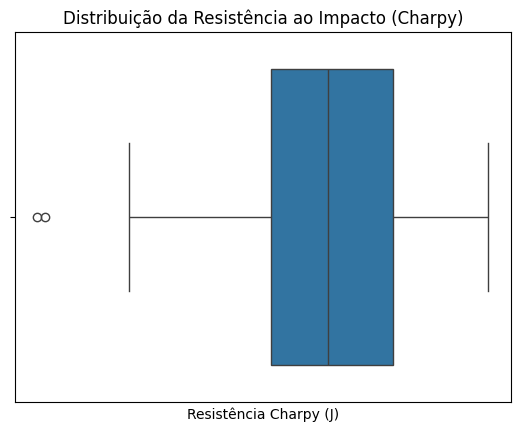

In [13]:
sns.boxplot(x=df_rastro['Resistência Charpy (J)'])
plt.xticks([])  # Remove os valores do eixo X
plt.xlabel("Resistência Charpy (J)")
plt.title("Distribuição da Resistência ao Impacto (Charpy)")
plt.show()

---

## Visualizações

Esta seção foca na exploração aprofundada dos dados pré-processados através de visualizações e estatísticas, buscando identificar padrões, tendências e insights relevantes para as hipóteses levantadas.

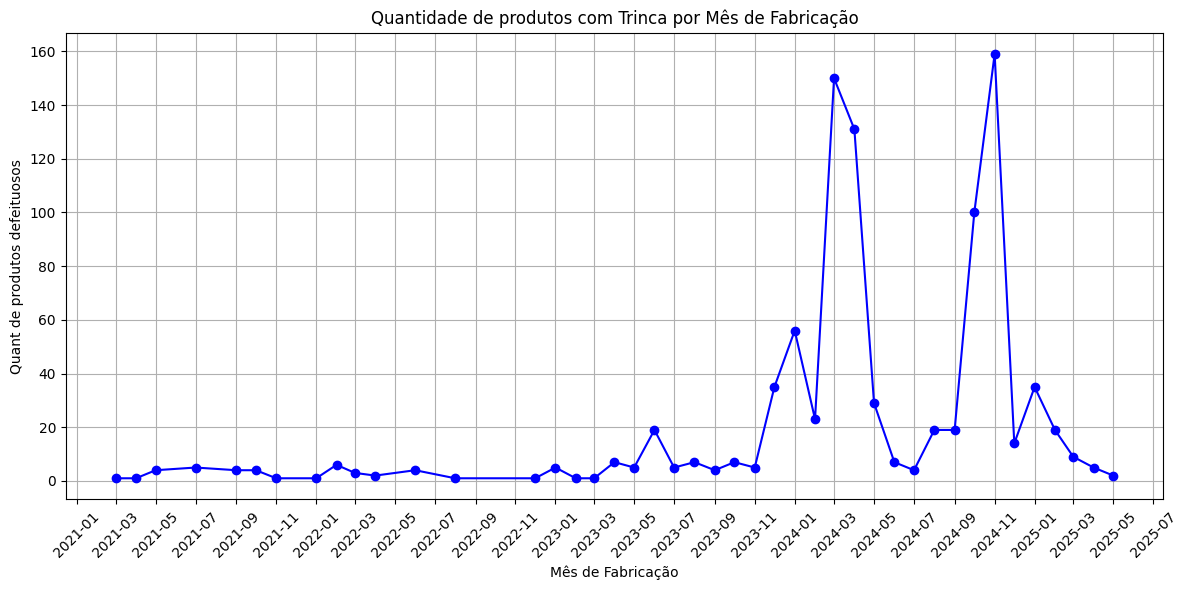

In [14]:
# Agrupar por mês (ano-mês) e somar as quantidades de produtos com trinca
df_mensal = df_Datafab.groupby(
    df_Datafab['Data fabricação'].dt.to_period('M')
)['Quant de produtos defeituosos'].sum()

# Converter o índice PeriodIndex em datetime (Timestamp)
df_mensal.index = df_mensal.index.to_timestamp()

# Agora o matplotlib consegue plotar normalmente:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_mensal.index, df_mensal.values, marker='o', linestyle='-', color='blue')

plt.title('Quantidade de produtos com Trinca por Mês de Fabricação')
plt.xlabel('Mês de Fabricação')
plt.ylabel('Quant de produtos defeituosos')
plt.grid(True)

# Ticks a cada 2 meses, formato 'YYYY‑MM'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Análise:**

* Há dois picos de concentração de falhas, entre outubro há março de 2024 e novembro também.

* Além disso, o gráfico sugere que apesar de momentos de picos concentrados do problema, a anomalia é algo recorrente e crônico, sempre tendo pequenos casos ao longo de todo período, sugerindo que pode ser ocasionado por outros fatores além do defeito na matéria prima condenada, como transporte ou mal uso do produto.

---

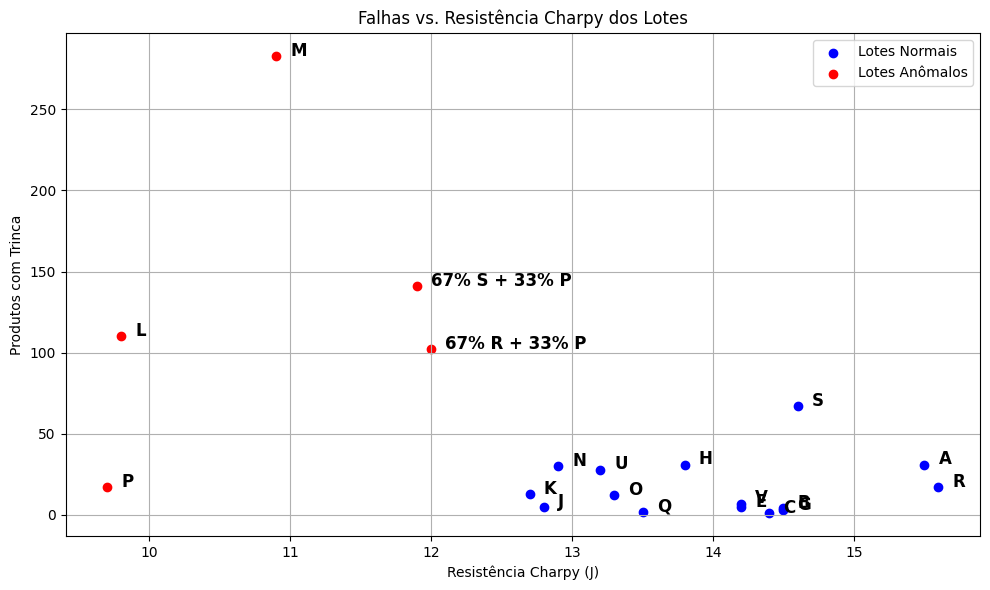

In [15]:
#Calcular falhas por lote a partir do df_reclamacoes
falhas_por_lote = (df_rec.groupby('Lote')['Quant de produtos defeituosos'].sum().reset_index().rename(columns={'Lote_mp': 'Lote', 'Quant de produtos defeituosos': 'Falhas'}))

#Juntar as informações
df_analise = pd.merge(
    df_rastro[['Lote', 'Resistência Charpy (J)']],
    falhas_por_lote,
    on='Lote',
    how='left'
)

# Lista dos lotes anômalos Resistência charpy <12 J
lotes_anomalia = ['L', 'M', 'P', '67% R + 33% P', '67% S + 33% P']

plt.figure(figsize=(10, 6))

# Para lotes anômalos, ponto vermelho
anomalia = df_analise['Lote'].isin(lotes_anomalia)
plt.scatter(df_analise.loc[~anomalia, 'Resistência Charpy (J)'],
            df_analise.loc[~anomalia, 'Falhas'], color='blue', label='Lotes Normais')

plt.scatter(df_analise.loc[anomalia, 'Resistência Charpy (J)'],
            df_analise.loc[anomalia, 'Falhas'], color='red', label='Lotes Anômalos')

# Rótulos dos lotes
for _, row in df_analise.iterrows():
    plt.text(
        row['Resistência Charpy (J)'] + 0.1,  # desloca um pouco para a direita
        row['Falhas'] + 0.1,                   # desloca um pouco para cima
        row['Lote'],
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.title('Falhas vs. Resistência Charpy dos Lotes')
plt.xlabel('Resistência Charpy (J)')
plt.ylabel('Produtos com Trinca')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Análise:**
* A comparação lado a lado evidencia inversão entre resistência e falha — ou seja, quanto menor a resistência, maior a falha.

* Isso justifica o uso da resistência ao impacto como uma variável crítica de qualidade.

* Podemos onservar a concentração dos lotes bons abaixo de 50 casos

---

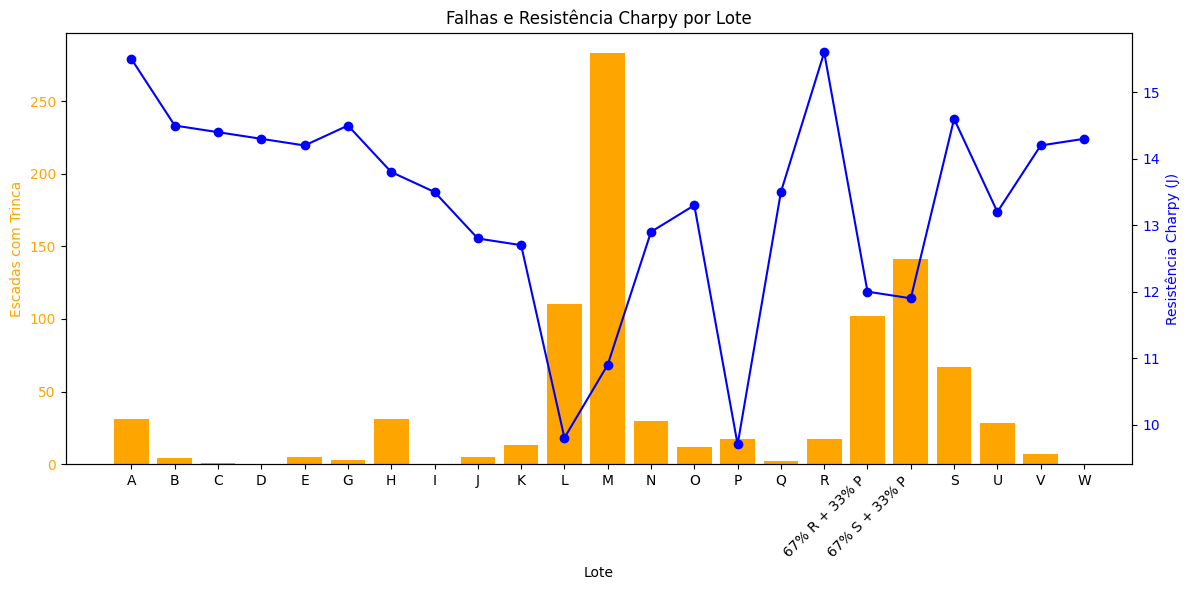

In [16]:
# Somar quantidade de escadas com trinca por lote
falhas_por_lote = df_rec.groupby('Lote')['Quant de produtos defeituosos'].sum().reset_index().rename(columns={'Quant de produtos defeituosos': 'Falhas'})

# Juntar falhas e resistência Charpy num dataframe único para plotagem
df_analise = pd.merge(
    df_rastro[['Lote', 'Resistência Charpy (J)']],
    falhas_por_lote,
    left_on='Lote',
    right_on='Lote',
    how='left'
)

# Aqui está a parte nova para ordenar segundo a ordem original em df_rastro['Lote'] ---
ordem_lotes = list(df_rastro['Lote'].unique())  # ordem original de uso

# Criar uma categoria para 'Lote' em df_analise usando essa ordem e ordenar pelo índice dessa categoria
df_analise['Lote'] = pd.Categorical(df_analise['Lote'], categories=ordem_lotes, ordered=True)
df_analise = df_analise.sort_values('Lote')

# Criar figura e eixo
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras de falhas
bars = ax1.bar(df_analise['Lote'], df_analise['Falhas'], color='orange', label='Falhas')
ax1.set_xlabel('Lote')
ax1.set_ylabel('Escadas com Trinca', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Segundo eixo Y: linha de resistência Charpy
ax2 = ax1.twinx()
ax2.plot(df_analise['Lote'], df_analise['Resistência Charpy (J)'], color='blue', marker='o', label='Charpy')
ax2.set_ylabel('Resistência Charpy (J)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Rotacionar só os rótulos dos lotes combinados (com '%')
for label in ax1.get_xticklabels():
    if '%' in label.get_text():
        label.set_rotation(45)
        label.set_ha('right')

plt.title('Falhas e Resistência Charpy por Lote')
fig.tight_layout()
plt.show()


**Análise do gráfico:**

* A distribuição do gráfico é parecida com o gráfico 1
* O lote L E M apontam uma fragilidade maior, bem como o lote S e seus derivados P e T

* Há uma tendência clara de que lotes com resistência Charpy abaixo de ~12 J apresentam mais falhas.

* Outros lotes possuem poucas falhas esporádicas, sugerindo que falhas menores ainda podem ocorrer por fatores externos (como transporte inadequado).

---

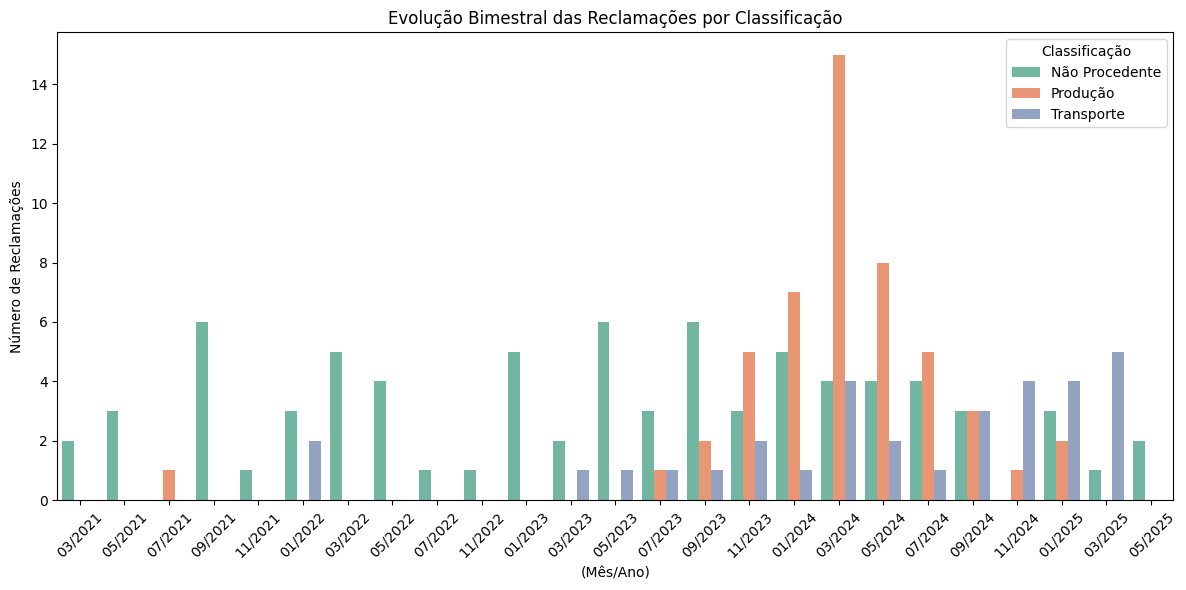

In [17]:
def arredondar_bimestre(data):
    if pd.isna(data):
        return pd.NaT
    mes = ((data.month - 1) // 2) * 2 + 1
    return pd.Timestamp(year=data.year, month=mes, day=1)

# Cria coluna com data arredondada ao bimestre (datetime)
df_rec['Data Bimestre'] = df_rec['Data fabricação'].apply(arredondar_bimestre)

# Cria coluna string formatada só com mês/ano (MM/YYYY)
df_rec['Bimestre MM/YYYY'] = df_rec['Data Bimestre'].dt.strftime('%m/%Y')

# Plotar countplot com essa coluna categórica de texto formatado
plt.figure(figsize=(12, 6))
sns.countplot(data=df_rec.sort_values('Data Bimestre'), x='Bimestre MM/YYYY', hue='Classificação', palette='Set2')

plt.xticks(rotation=45)
plt.title('Evolução Bimestral das Reclamações por Classificação')
plt.xlabel('(Mês/Ano)')
plt.ylabel('Número de Reclamações')
plt.tight_layout()
plt.show()


**Análise:**

* A classificação "Produção" aumentou significativamente justamente quando houve maior concentração de produtos trincados e a indentificação da anomalia.

* Isso indica que o entendimento da origem do problema evoluiu com o tempo, saindo da hipótese de erro no transporte para um problema realmente relacionado ao processo fabril ou material.

* O gráfico ajuda a visualizar essa transição de diagnóstico feita pela equipe técnica e suporte ao cliente.

---

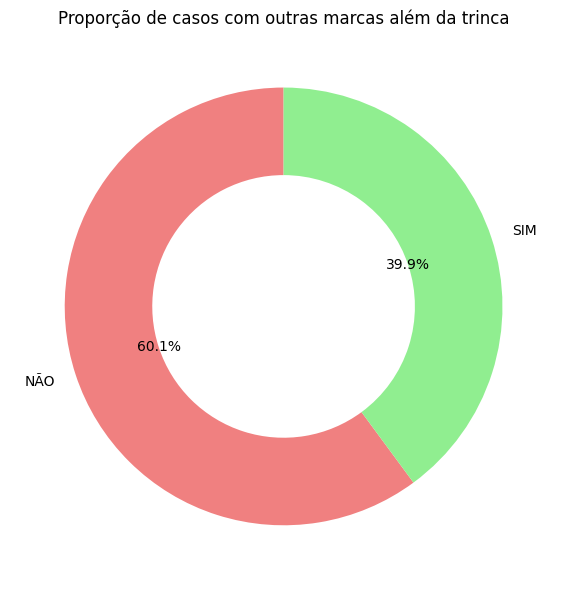

In [18]:
# Verifica a contagem dos valores "Sim" e "Não"
contagem_marcas = df_rec['Outras avarias observadas?'].value_counts()

# Cria o gráfico de pizza
plt.figure(figsize=(6, 6))
contagem_marcas.plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90, wedgeprops=dict(width=0.4))

plt.title('Proporção de casos com outras marcas além da trinca')
plt.ylabel('')  # Remove o rótulo do eixo Y
plt.tight_layout()
plt.show()

**Análise:**
A maioria dos casos reportados de trincas ocorre sem a presença de outras marcas, o que reforça a hipótese de que os danos possam estar associados a falhas de origem interna (ex: matéria-prima ou processo). No entanto, uma parcela significativa dos casos apresenta outras marcas visíveis, o que pode indicar problemas no manuseio, transporte ou uso incorreto. Essa distinção é essencial para entender a natureza multifatorial das reclamações e orientar ações corretivas distintas.

---

/tmp/ipython-input-19-2214546210.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outras_marcas['Em_Periodo_Critico'] = df_outras_marcas['Data fabricação'].apply(em_periodo_critico)


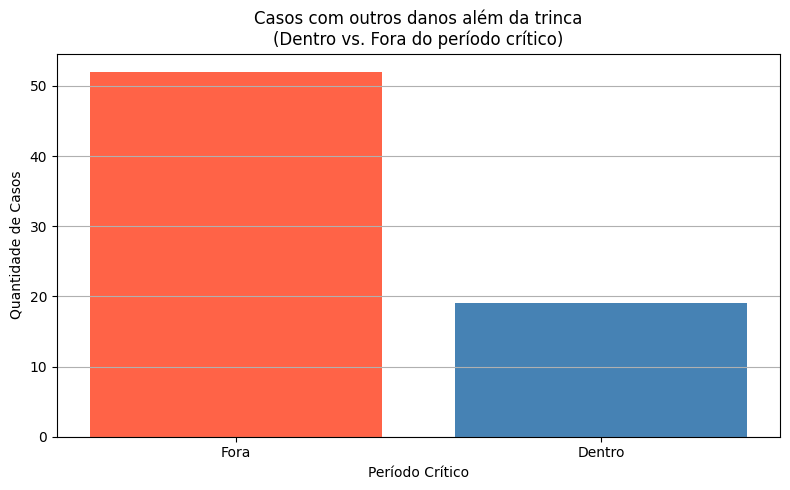

In [19]:
# Filtra para pegar só os casos com outras marcas além da trinca
df_outras_marcas = df_rec[df_rec['Outras avarias observadas?'] == 'SIM']

def em_periodo_critico(data):
    return (
        (pd.to_datetime('2023-11-28') <= data <= pd.to_datetime('2024-04-02')) or
        (pd.to_datetime('2024-07-21') <= data <= pd.to_datetime('2024-11-14'))
    )

# Aplica a função para criar a nova coluna
df_outras_marcas['Em_Periodo_Critico'] = df_outras_marcas['Data fabricação'].apply(em_periodo_critico)

# Contagem dos valores True/False
contagem = df_outras_marcas['Em_Periodo_Critico'].value_counts().rename({True: 'Dentro', False: 'Fora'})

# Plotar gráfico
plt.figure(figsize=(8,5))
plt.bar(contagem.index, contagem.values, color=['tomato', 'steelblue'])
plt.title('Casos com outros danos além da trinca\n(Dentro vs. Fora do período crítico)')
plt.ylabel('Quantidade de Casos')
plt.xlabel('Período Crítico')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Análise:**
A maior parte dos casos com danos adicionais além da trinca ocorreu fora dos períodos críticos, definidos pelos lotes com menor resistência ao impacto. Isso reforça a hipótese de que esses danos extras estão mais relacionados a falhas logísticas, como transporte e empilhamento — do que a um problema sistêmico no material. Além disso, o padrão de trinca observado nesses casos provavelmente ocorre porque essa região é estruturalmente mais frágil e, consequentemente, a primeira a ser afetada quando submetida a impactos maiores.

---

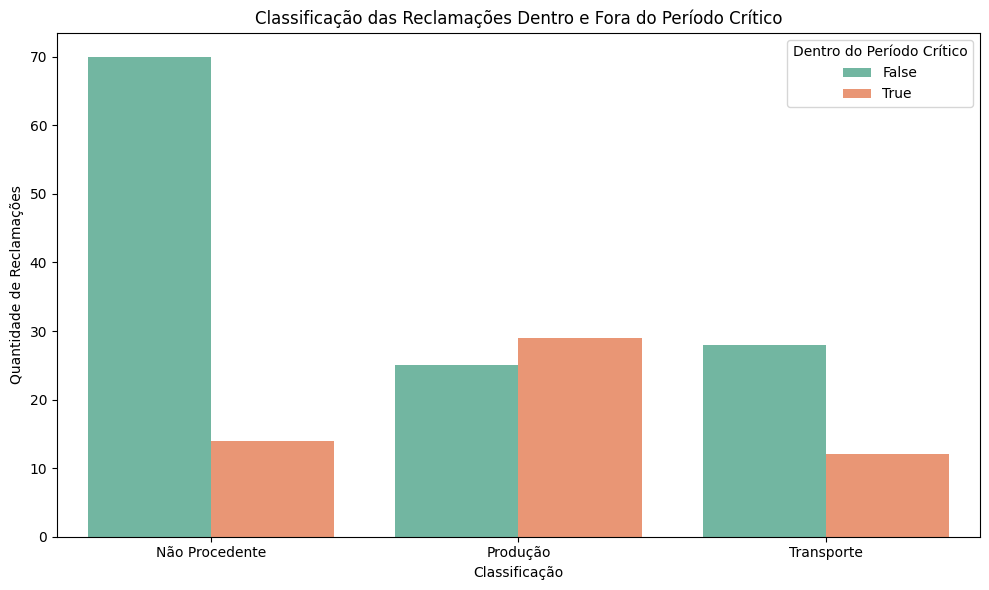

In [20]:
# Função para marcar se está no período crítico
def em_periodo_critico(data):
    return (
        (pd.to_datetime('2023-11-28') <= data <= pd.to_datetime('2024-04-02')) or
        (pd.to_datetime('2024-07-21') <= data <= pd.to_datetime('2024-11-14'))
    )

df_rec['Periodo_Critico'] = df_rec['Data fabricação'].apply(em_periodo_critico)

# Gráfico
plt.figure(figsize=(10,6))
sns.countplot(data=df_rec, x='Classificação', hue='Periodo_Critico', palette='Set2')
plt.title('Classificação das Reclamações Dentro e Fora do Período Crítico')
plt.xlabel('Classificação')
plt.ylabel('Quantidade de Reclamações')
plt.legend(title='Dentro do Período Crítico')
plt.tight_layout()
plt.show()


**Análise:**

* Alta quantidade de "Não Procedente" fora do período crítico (70 casos):

Isso sugere uma possível subnotificação do problema real. Muitas falhas associadas ao material podem ter sido, inicialmente, atribuídas incorretamente ao mau uso ou transporte por parte do cliente.
Esse cenário é compatível com o fato de que a anomalia só foi reconhecida como falha sistêmica após uma investigação técnica, o que indica que havia um viés anterior de julgamento contra o cliente.

* Aumento das classificações como "Produção" durante o período crítico:

Com a identificação da anomalia relacionada à matéria-prima, os registros passaram a ser corretamente classificados como falha de produção (30 dentro vs. 25 fora).
Isso reflete uma evolução no diagnóstico das causas, após a descoberta da origem técnica do problema.

* Queda nas classificações por "Transporte" no período crítico:

As ocorrências atribuídas ao transporte diminuíram de 25 para 15 casos.
Essa redução sugere uma correção de erros de classificação anteriores, reduzindo os falsos positivos atribuídos a falha logística.

---
# Conclusão

A análise exploratória dos dados relacionados à anomalia de trincas em perfis estruturais de compósitos poliméricos possibilitou uma visão abrangente sobre a distribuição dos problemas ao longo do tempo, a relação com os lotes de matéria-prima e a possível influência de fatores externos como transporte e manuseio.

As quatro hipóteses levantadas foram analisadas com o suporte de visualizações gráficas e cruzamento de dados:

**Hipótese 1 – A ocorrência de trincas é crônica e pode acontecer mesmo em lotes considerados "bons".**
*Confirmada.* A análise temporal mostrou que, mesmo fora dos períodos críticos associados a lotes de baixa resistência ao impacto, ainda ocorrem trincas pontuais. Isso indica que a região onde o defeito aparece é naturalmente sensível e que há uma fragilidade estrutural que pode ser agravada por pequenos impactos durante transporte ou empilhamento.

**Hipótese 2 – Existe correlação entre a resistência Charpy e a quantidade de produtos com trinca.**
*Confirmada.* Os gráficos de falhas por lote versus resistência ao impacto revelaram uma tendência clara: os lotes com menor resistência Charpy (< 12 J) apresentaram maior número de falhas. Esse padrão reforça que a tenacidade do material está fortemente relacionada à propensão à trinca.

**Hipótese 3 – O problema se agravou em 2024, com lotes de menor resistência.**
*Confirmada.* A distribuição mensal das falhas evidenciou dois picos de anomalias, ambos compatíveis com o uso de lotes que apresentaram menor desempenho em ensaios de impacto. Esse agravamento temporário sustenta a hipótese de que a matéria-prima desempenhou papel central na falha observada.

**Hipótese 4 – A presença de outras avarias além das trincas pode indicar influência de transporte ou manuseio.**
*Confirmada.* A análise da proporção de reclamações com marcas adicionais revelou que parte significativa dos casos com “outras marcas” está fora dos períodos críticos. Isso indica que esses danos são compatíveis com falhas logísticas ou de uso, e não com defeitos de fabricação, reforçando a importância de um controle mais amplo da cadeia pós-produção e da classificação das falhas.

Dessa forma, a análise realizada não apenas validou as hipóteses, como também permitiu identificar os períodos críticos, os lotes mais suscetíveis e fatores externos que contribuem para a falha. As visualizações facilitaram o diagnóstico e fornecem base sólida para tomada de decisão, tanto para ações corretivas quanto preventivas, como controle de qualidade da matéria-prima, revisão do processo de transporte e reavaliação do projeto da região afetada para a correta classificação da reclamação.

---
